In [1]:
import tkinter.filedialog
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import glob
from tifffile import imsave

In [2]:
#select a directory containing tif-stacks to process
#tif-stacks must have equal dimensions

#reference code :https://stackoverflow.com/questions/36643151/average-of-multiple-stacks/36646281

sd=tkinter.filedialog.askdirectory()

#list of files to process
fl= glob.glob(os.path.join(sd,'*.tif'))
print (fl)

#number of files to process
n_files=np.shape(fl)[0]

im = Image.open(fl[0])

['D:/test_convert_to_tif\\DM012_DM012_Huc-Gal4_UAS-ChR2-mCherry_UAS-paGFP_fish10_01_warp_m0g120c8e1e-1x52r3.tif', 'D:/test_convert_to_tif\\DM012_DM012_Huc-Gal4_UAS-ChR2-mCherry_UAS-paGFP_fish11_01_warp_m0g120c8e1e-1x52r3.tif', 'D:/test_convert_to_tif\\DM012_DM012_Huc-Gal4_UAS-ChR2-mCherry_UAS-paGFP_fish12_01_warp_m0g120c8e1e-1x52r3.tif', 'D:/test_convert_to_tif\\DM012_DM012_Huc-Gal4_UAS-ChR2-mCherry_UAS-paGFP_fish14_01_warp_m0g120c8e1e-1x52r3.tif']


In [16]:
n = 0
while True:
    n += 1
    try:
        im.seek(n)
    except:
        break
n_frames=n

#loop through all images,
#read each frame and accumulate frame-wise sum over all stacks

w, h = im.size
temp = np.zeros( (h,w,n_frames), dtype=np.int32 )

for i in range(n_files):
    print ('processing file: ', i)
    im = Image.open(fl[i])

    for n in range (n_frames):
        curframe = np.array(im.getdata()).reshape(h,w)
        temp[:,:,n] += curframe
        im.seek(n)
        #print (['frame: ', n],"         \r",)

avgStack=temp/n_files

processing file:  0
processing file:  1
processing file:  2
processing file:  3


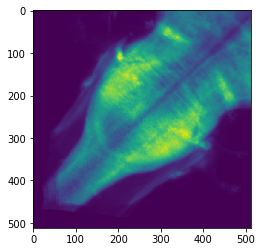

In [17]:
plt.imshow(np.average(avgStack,axis=2))

In [19]:
imsave(sd+'/average_brain16bit.tif', avgStack.T.astype(np.uint16)) #can change bitsize before exporting